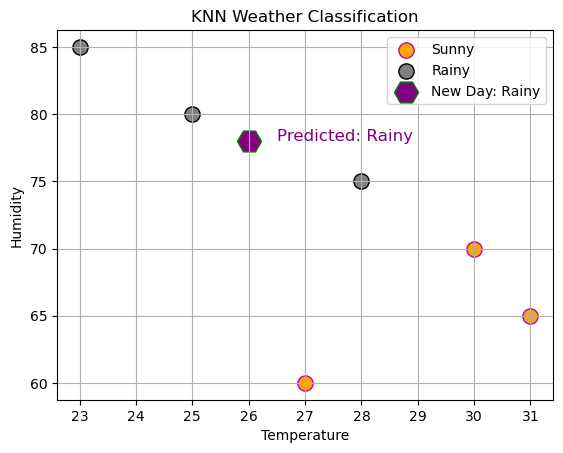

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X = np.array([
    [30, 70],
    [25, 80],
    [27, 60],
    [31, 65],
    [23, 85],
    [28, 75],
])
Y = np.array([0,1,0,0,1,1])

new_weather = np.array([[26, 78]])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)

pred = knn.predict(new_weather)[0]

label_map = {0: "Sunny", 1: "Rainy"}

plt.scatter(X[Y==0, 0], X[Y==0, 1], color='orange', label='Sunny', s=120, edgecolor='m')
plt.scatter(X[Y==1, 0], X[Y==1, 1], color='gray', label='Rainy', s=120, edgecolor='k')

colors = ['orange','purple']

plt.scatter(new_weather[0, 0], new_weather[0, 1],
            color=colors[pred], marker='H', s=300,
            edgecolor='green', label=f'New Day: {label_map[pred]}')

plt.text(new_weather[0, 0] + 0.5, new_weather[0, 1],
         f'Predicted: {label_map[pred]}', fontsize=12, color=colors[pred])

plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('KNN Weather Classification')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import math

data = pd.DataFrame({
    "Outlook": [
        "sunny","sunny","overcast","rain","rain","rain","overcast",
        "sunny","sunny","rain","sunny","overcast","overcast","rain"
    ],
    "Humidity": [
        "high","high","high","high","normal","normal","normal",
        "high","normal","normal","normal","high","normal","high"
    ],
    "PlayTennis": [
        "no","no","yes","yes","yes","no","yes",
        "no","yes","yes","yes","yes","yes","no"
    ]})

def entropy (co1):
    values, counts= np.unique(col, return_counts= True)
    return - sum((c/len (col))* math.log2(c/len(col)) for c in counts)

def info_gain(df, attr, target):
    total= entropy(df[target])
    vals = df[attr].unique()
    weighted = sum((len(df [df[attr]==v]/len(df))* entropy(df[df[attr]==v][target])
                    for v in vals)
                   return total- weighted

def id3(df, target, attrs):
       if len (df[target].unique()) ==1:
           return df[target].iloc[0]
        if not attrs:
            return df[target].mode()[0]

        best= max(attrs, key=lambda a: info_gain(df, a, target))
        tree = {best: {}}
for val in df[best].unique():
    sub= df[df[best] ==val]

Mean Squared Error: 2900.19
R-Squared: 0.45


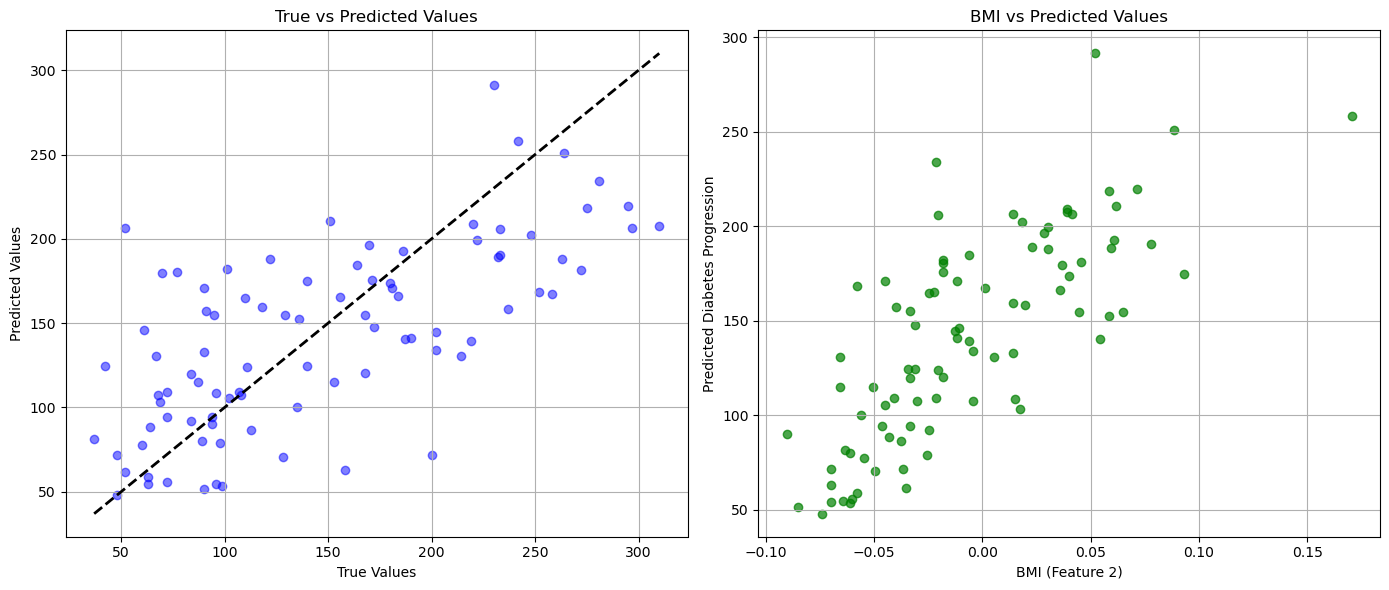

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(y_test, y_pred, color='blue', alpha=0.5)
axs[0].plot([y_test.min(), y_test.max()],
            [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0].set_title("True vs Predicted Values")
axs[0].set_xlabel("True Values")
axs[0].set_ylabel("Predicted Values")
axs[0].grid(True)

axs[1].scatter(X_test[:, 2], y_pred, color='green', alpha=0.7)
axs[1].set_title("BMI vs Predicted Values")
axs[1].set_xlabel("BMI (Feature 2)")
axs[1].set_ylabel("Predicted Diabetes Progression")
axs[1].grid(True)

plt.tight_layout()
plt.show()

